# 개요

기업에서는 퇴사나 이직과 같은 직원 유출이 일어나게 되면 조직과 회사에 부정적인 영향을 주기 때문에 직원 유출이 일어나지 않도록 HR데이터를 이용하여 이를 방지하려고 합니다.  

퇴사할 직원을 미리 인지해서 조직이 성과창출하는데 있어서 부정적인 영향을 줄이고 직원 유출을 막기위하여 퇴사자를 예측하는 모델을 만들도록 하겠습니다.

# 필요 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# 데이터 설명
- `Emp_Id` : 직원의 ID
- `satisfaction_level` : 직원의 만족도
 - 100% 또는 1이 매우 만족, 0% 또는 0이 매우 불만족
- `last_evaluation` : 직원들이 가장 최근 실시한 평가 점수
 - 0~1
- `number_project` : 직원이 참여한 프로젝트 수
- `average_montly_hours` : 지난 한달동안 직원의 평균 근무 시간
- `time_spend_company` : 근속년수
- `Work_accident` : 직원이 업무상 사고(산업재해)를 당한경우

- `promotion_last_5years` : 지난 5년간 승진을 한 경우
- `Department` : 직원이 근무하는 부서
- `salary` : 급여수준
 - low, medium, high
- `left(target)` : 직원이 퇴사한경우

# 데이터 로드

In [2]:
path = 'C:/Users/User/Desktop/AIB_13/data/HR_Employee_Data.xlsx'
df = pd.read_excel(path, sheet_name=0)
df.shape

(14999, 11)

## 타겟데이터 분리

In [3]:
target = 'left'
X = df.drop(target, axis=1)
y = df[target]

X.shape, y.shape

((14999, 10), (14999,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

print("Train Set : ", X_train.shape, y_train.shape)
print("Test Set : ", X_test.shape, y_test.shape)

Train Set :  (11249, 10) (11249,)
Test Set :  (3750, 10) (3750,)


훈련데이터는 11249개, 테스트데이터는 3750개의 데이터를 사용하겠습니다.

# EDA

EDA를 진행하기전에 원활하게 코드를 작성하기 위하여 훈련데이터와 타겟데이터를 합쳐주도록 하겠습니다.

In [5]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
4037,IND24793,0.86,0.64,5,188,3,0,0,product_mng,medium,0
9257,IND17841,0.95,0.94,2,269,4,1,0,sales,low,0
13183,IND04389,0.89,0.74,5,260,6,0,0,technical,medium,0
5921,IND37411,0.78,0.95,5,273,2,0,0,technical,low,0
1574,IND27514,0.36,0.51,2,129,3,0,0,support,low,1


## 데이터의 정보

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11249 entries, 4037 to 12156
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 11249 non-null  object 
 1   satisfaction_level     11249 non-null  float64
 2   last_evaluation        11249 non-null  float64
 3   number_project         11249 non-null  int64  
 4   average_montly_hours   11249 non-null  int64  
 5   time_spend_company     11249 non-null  int64  
 6   Work_accident          11249 non-null  int64  
 7   promotion_last_5years  11249 non-null  int64  
 8   Department             11249 non-null  object 
 9   salary                 11249 non-null  object 
 10  left                   11249 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.0+ MB


데이터의 정보를 확인해보니 데이터의 크기는 11249개의 데이터와 특성으로는 숫자형 8개, 범주형 3개의 총 11개의 특성을 가지고 있는 것을 확인할 수 있습니다.

하지만 satisfaction_level, last_evalutation, average_montly_hours 컬럼은 연속형 데이터이고, 나머지 컬럼은 범주형데이터입니다.

## 결측치

데이터의 결측치를 확인해보도록 하겠습니다.

In [7]:
train.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

결측치는 존재하지 않는것으로 확인되었습니다.

## 중복데이터 확인

데이터의 중복값이 있는지 확인해보겠습니다.

In [8]:
train.duplicated().sum()

0

데이터의 중복값도 없는 것으로 확인되었습니다.

## 타겟데이터의 분포 확인
- 얼마나 많은 인원이 퇴사를 했는지 확인해보겠습니다.

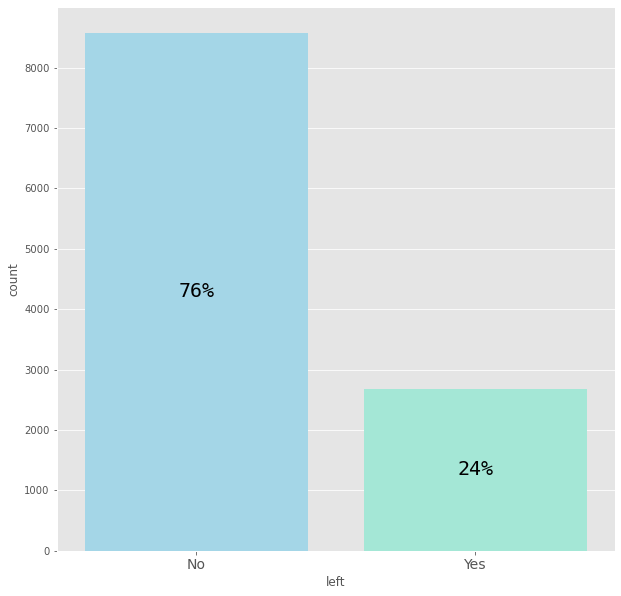

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(data=train, x='left', palette = ["#99DCF2", "#99F2DB"])

#text
left_no = np.round(train['left'].value_counts(normalize=True)[0],2) * 100
left_no = str(int(left_no)) + "%"
left_yes = np.round(train['left'].value_counts(normalize=True)[1],2) * 100
left_yes =  str(int(left_yes)) + "%"
left_no_value = train['left'].value_counts()[0]
left_yes_value = train['left'].value_counts()[1]
plt.text(x=0, y=left_no_value/2, s=left_no, fontsize=20, ha='center', va= 'center',fontfamily='monospace')
plt.text(x=1, y=left_yes_value/2, s=left_yes, fontsize=20, ha='center',va= 'center', fontfamily='monospace')

#xticks
plt.xticks(ticks=[0,1],labels=['No',"Yes"], fontsize=14)
plt.show()


타겟의 분포가 불균형하기 때문에 정확도로 예측을 하기에는 어려움이 높아 정밀도와 민감도의 조화평균인 f1_score 를 사용하는 것이 좋을 것 같습니다.

## 직원의 만족도 특성 확인

직원의 만족도를 나타내는 특성(satisfaction_level)은 0~1의 값으로 1로갈수록 매우만족, 0으로 갈수록 매우불만족을 나타내고 있습니다.

### 직원의 만족도의 분포 확인

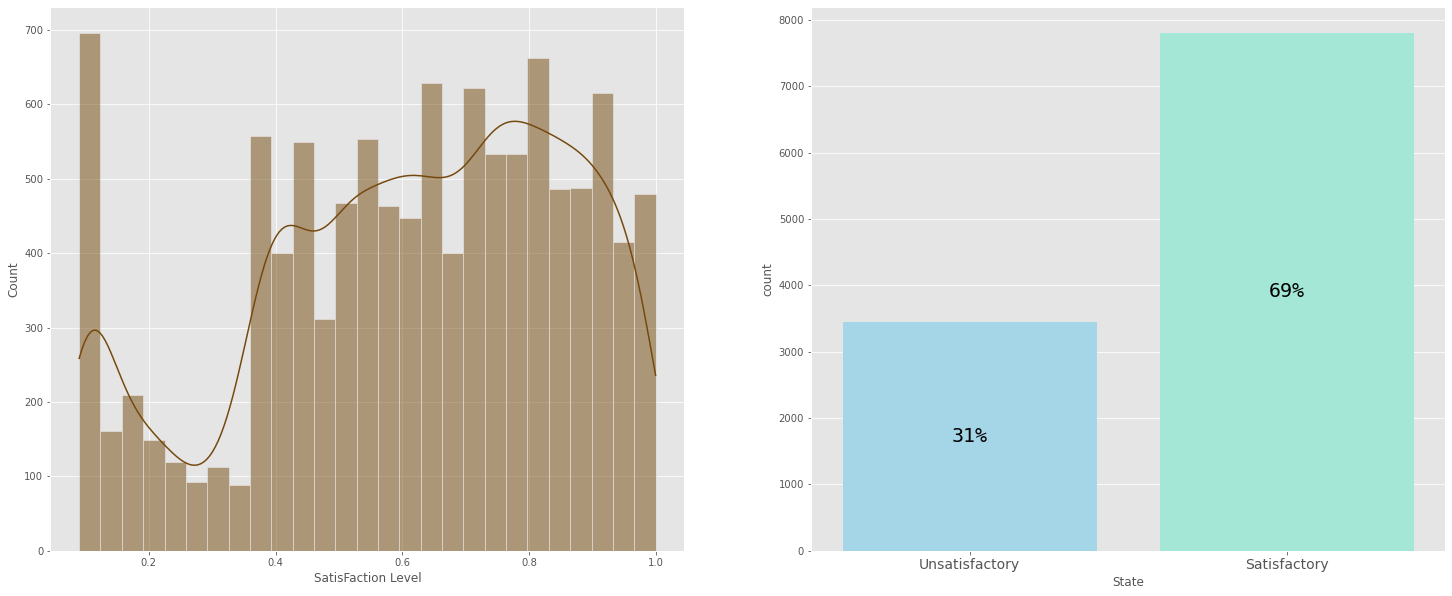

In [10]:
copy=train.copy()
copy['satisfaction'] = None
copy.loc[copy['satisfaction_level'] >= 0.5, 'satisfaction'] = 1
copy.loc[copy['satisfaction_level'] < 0.5, 'satisfaction'] = 0

unsatisfaction_ratio = np.round(copy['satisfaction'].value_counts(normalize=True)[0],2) * 100
satisfaction_ratio = np.round(copy['satisfaction'].value_counts(normalize=True)[1],2) * 100
unsatisfaction_ratio = str(int(unsatisfaction_ratio)) + "%"
satisfactory_ratio = str(int(satisfaction_ratio)) + "%"
unsatisfaction = copy['satisfaction'].value_counts()[0]
satisfaction = copy['satisfaction'].value_counts()[1]


f, ax = plt.subplots(1,2,figsize=(25,10))
sns.histplot(data=train, x='satisfaction_level', kde=True, ax=ax[0],color = ['#75490D'])
sns.countplot(data=copy, x="satisfaction", ax=ax[1], palette = ["#99DCF2", "#99F2DB"])

#xlabel
ax[0].set_xlabel('SatisFaction Level')
ax[1].set_xlabel('State')

#text
ax[1].text(x=0, y=unsatisfaction/2, s=unsatisfaction_ratio, fontsize=20, ha='center',va= 'center', fontfamily='monospace')
ax[1].text(x=1, y=satisfaction/2, s=satisfactory_ratio, fontsize=20, ha='center',va= 'center', fontfamily='monospace')

#xticks
ax[1].set_xticks(ticks=[0,1],labels=['Unsatisfactory',"Satisfactory"], fontsize=14)


plt.show()

직원의 만족도의 분포를 확인해보니 매우 불만족을 나타내는 값들이 가장 많은 것으로 나타났습니다.

직원의 만족도를 히스토그램과 0.5를 기준으로 나누어서 확인해보니 전반적으로 직원의 만족도가 만족한다의 인원이 많은것으로 확인되었습니다.

약간 불만족의 인원들보다 매우불만족하다는 인원들이 많았고, 매우만족하다는 인원들보다는 전반적으로 만족한다는 인원들이 많은것으로 확인되었습니다.

### 직원의 만족도에 따른 퇴사유무 확인

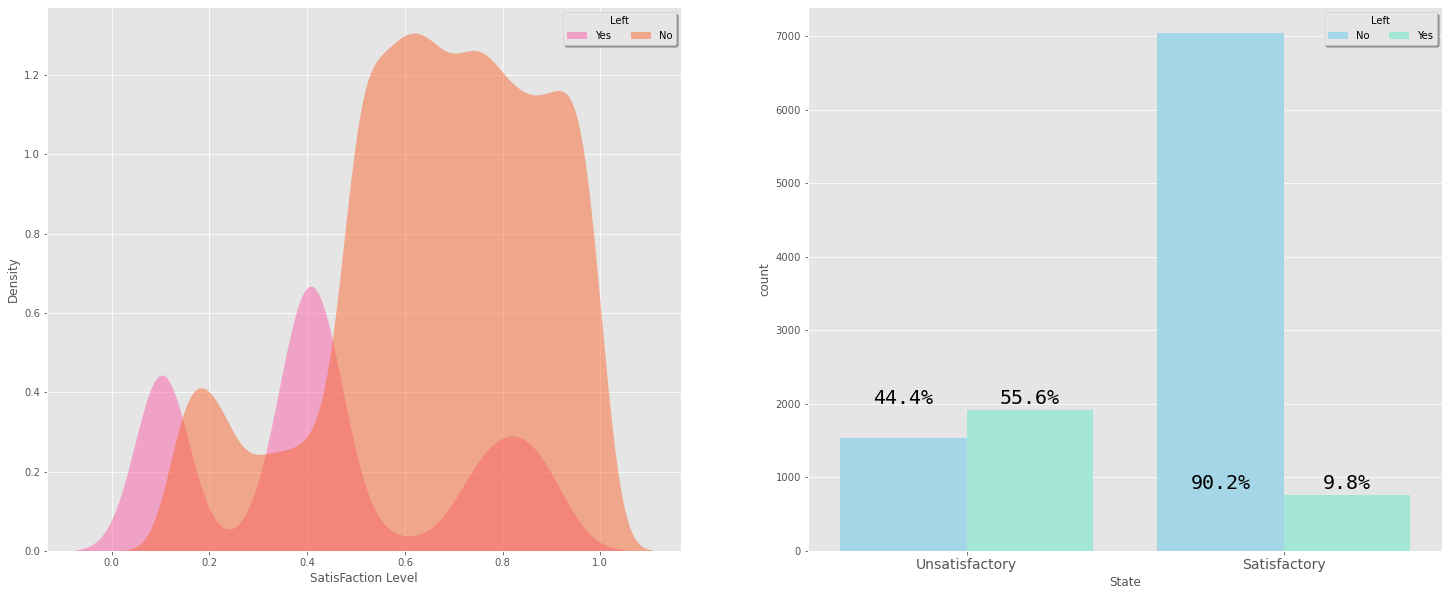

In [11]:
f, ax = plt.subplots(1,2,figsize=(25,10))
sns.kdeplot(data=train, x='satisfaction_level', hue='left', fill=True, alpha=.5, linewidth=0, palette = ["#FA6933", "#FA61A6"],ax=ax[0])
sns.countplot(data=copy, x='satisfaction', hue='left', palette = ["#99DCF2", "#99F2DB"])

#xlabel
ax[0].set_xlabel('SatisFaction Level')
ax[1].set_xlabel('State')

#text
for i in range(len([0,1])):
    unsatisfaction_ratio = copy.loc[copy['satisfaction'] == 0]['left'].value_counts(normalize=True)[i]
    unsatisfaction_ratio = str(round(unsatisfaction_ratio * 100, 1)) + "%"
    unsatisfaction_value = copy.loc[copy['satisfaction'] == 0]['left'].value_counts()[1]
    
    satisfaction_ratio = copy.loc[copy['satisfaction'] == 1]['left'].value_counts(normalize=True)[i]
    satisfaction_ratio = str(round(satisfaction_ratio * 100, 1)) + "%"
    satisfaction_value = copy.loc[copy['satisfaction'] == 1]['left'].value_counts()[1]
    if i == 0:
        x = -0.2
        ax[1].text(x=x, y=unsatisfaction_value+150, s=unsatisfaction_ratio, fontsize=20, ha='center',va='center', fontfamily='monospace')
        ax[1].text(x=x+1, y=satisfaction_value+150, s=satisfaction_ratio, fontsize=20, ha='center',va='center',fontfamily='monospace')
    else:
        x = 0.2
        ax[1].text(x=x, y=unsatisfaction_value+150, s=unsatisfaction_ratio, fontsize=20, ha='center',va='center', fontfamily='monospace')
        ax[1].text(x=x+1, y=satisfaction_value+150, s=satisfaction_ratio, fontsize=20, ha='center',va='center',fontfamily='monospace')
    


#xticks
ax[1].set_xticks(ticks=[0,1],labels=['Unsatisfactory',"Satisfactory"], fontsize=14)
#legend
ax[0].legend(['Yes',"No"], ncol=2, frameon=True, shadow=True, title='Left')
ax[1].legend(["No","Yes"], ncol=2,frameon=True, shadow=True,  title='Left')
plt.show()

전반적으로 회사에 대하여 불만족했을때 회사를 퇴사하는경우가 많았고, 회사에 대하여 만족하였을때는 회사에 남아있는 경우가 많았습니다.

## 마지막 평가 점수 특성 확인

last_evaluation 컬럼의 값들이 소수점으로 되어있는데 점수를 직관적으로 판단하기 위하여 100을 곱하여 바꾸어주겠습니다.

In [12]:
train['last_evaluation'] = train['last_evaluation'].apply(lambda x : x*100)
X_test['last_evaluation'] = X_test['last_evaluation'].apply(lambda x : x*100)

훈련데이터와 테스트데이터 모두 변경해주었습니다.

### 마지막 평가 점수의 분포 확인

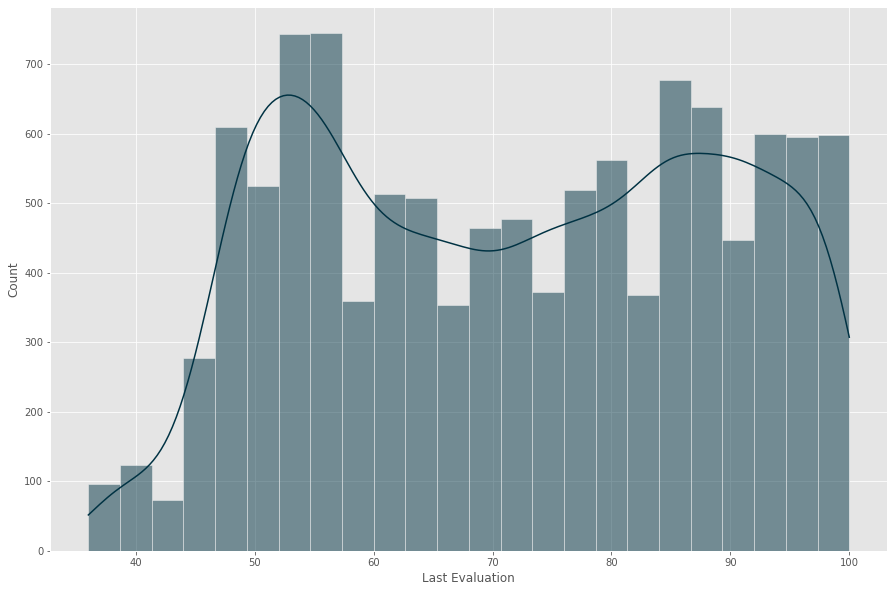

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(data=train, x='last_evaluation', kde=True, color = ["#003243"])
plt.xlabel('Last Evaluation')
plt.show()

직원들이 평가를 할 때 하위권의 점수를 주기 보다는 중상위권의 점수를 많이 준것으로 보여지고,
점수를 하위권으로 받은 직원들은 적은것으로 확인되었습니다.

### 마지막 평가 점수에 따른 퇴사유무 확인

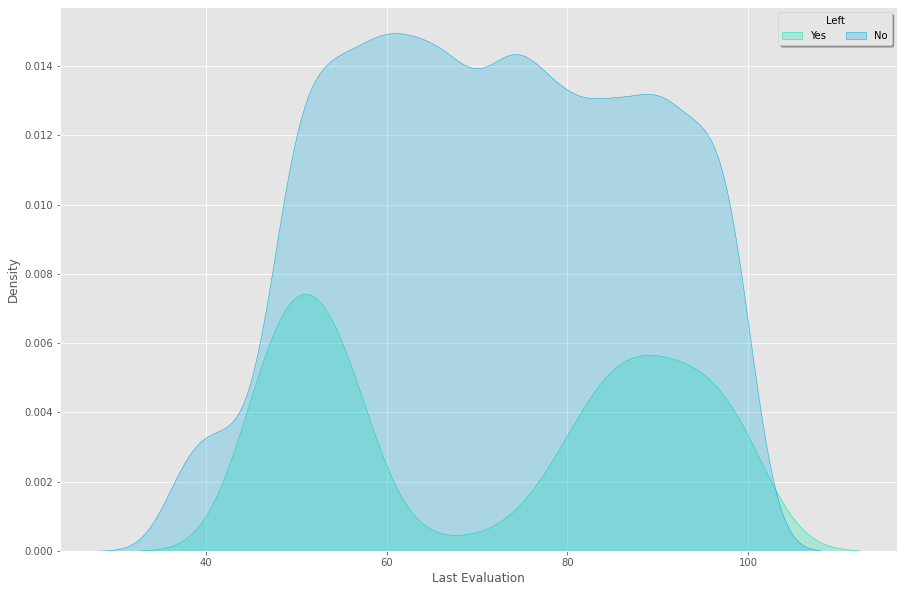

In [14]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=train, x='last_evaluation', hue='left', fill=True, palette = ["#00A9E0", "#02E7AC"])
plt.xlabel('Last Evaluation')
plt.legend(['Yes',"No"], ncol=2, frameon=True, shadow=True, title='Left')
plt.show()

비교적 중위권의 점수를 받은 분들이 퇴사를 하지 않은 것으로 보이고, 비교적 낮음 점수나 높은 점수를 받은 분들이 퇴사를 한것으로 보입니다.

## 프로젝트의 수 특성 확인

### 프로젝트의 수 특성의 분포 확인

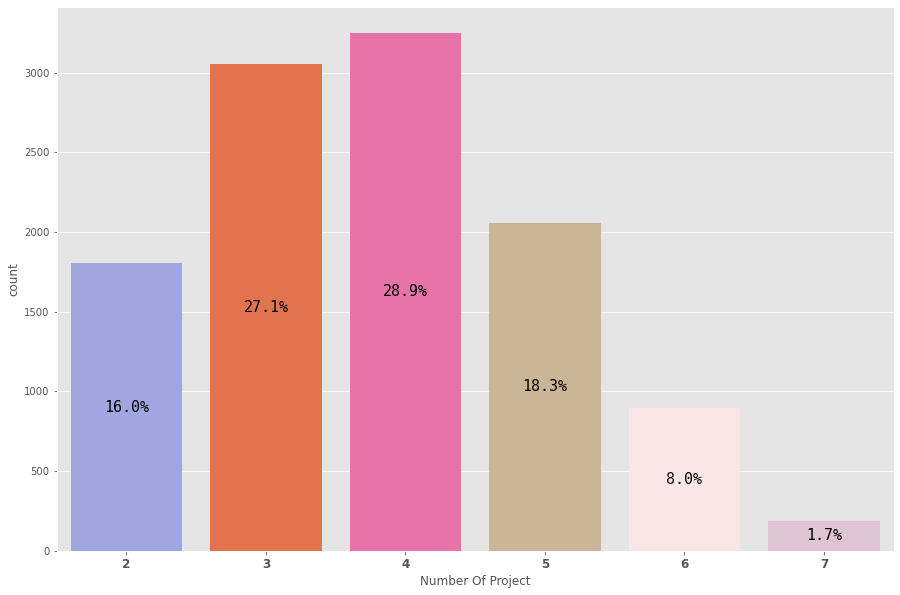

In [15]:
total = train['number_project'].shape[0]
project_value = train['number_project'].value_counts().values
project_ratios = train['number_project'].value_counts() / total
project_palette = ['#969CEA', "#FA6933","#FA61A6","#D2B68F","#FFE2E4","#E4BFD4"]
plt.figure(figsize=(15,10))
sns.countplot(data=train, x='number_project',palette = project_palette)
for i in range(len(project_ratios)):
    value = str(round(project_ratios.values[i] * 100, 1))+"%"
    y = project_value[i]
    plt.text(x=project_ratios.index[i]-2, y=y/2, s=value, fontsize=15, ha='center', va= 'center',fontfamily='monospace')
plt.xticks(weight='bold',size=12)
plt.xlabel("Number Of Project")
plt.show()

4개의 프로젝트를 수행한 직원들이 가장 많았고, 3개, 5개, 2개순으로 많았습니다.

### 프로젝트 수에 따른 퇴사유무 확인

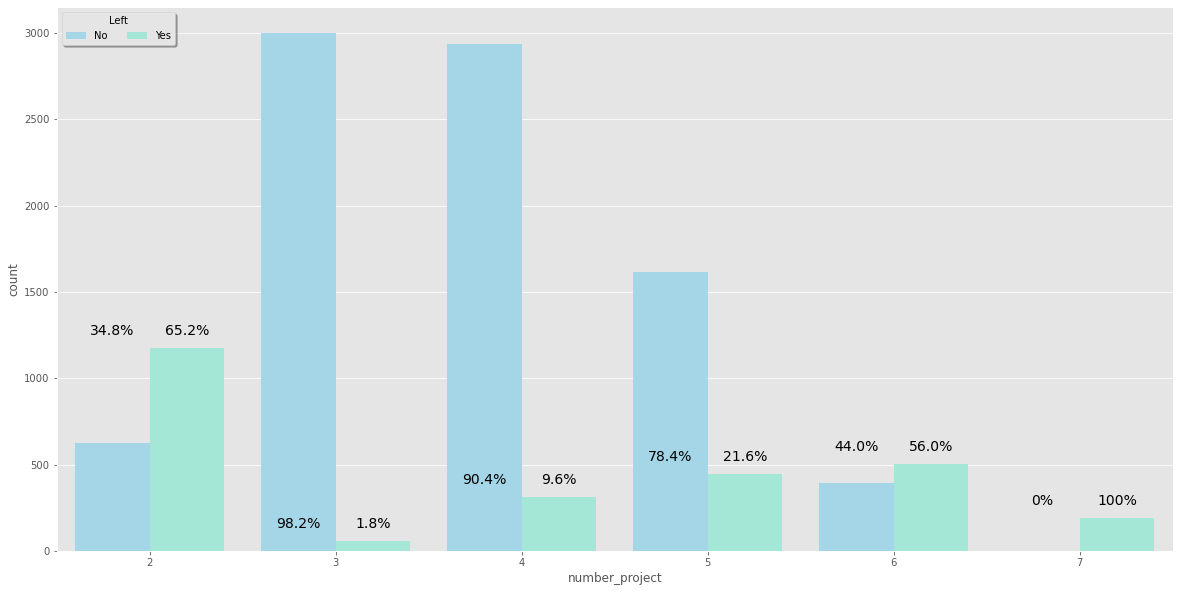

In [16]:

project_unique = sorted(train['number_project'].unique())
plt.figure(figsize=(20,10))
sns.countplot(data=train, x='number_project', hue='left', palette = ["#99DCF2", "#99F2DB"])
plt.legend(['No',"Yes"], ncol=2, frameon=True, shadow=True, title='Left')
for i in range(len(project_unique)-1):
    ratio1 = train.loc[train['number_project']==project_unique[i]]['left'].value_counts(normalize=True)[0]
    ratio2 = train.loc[train['number_project']==project_unique[i]]['left'].value_counts(normalize=True)[1]
    y = train.loc[train['number_project']==project_unique[i]]['left'].value_counts()[1]
    ratio1 = str(round(ratio1*100, 1)) + "%"
    ratio2 = str(round(ratio2*100, 1)) + "%"
    plt.text(x=i-0.2, y=y+100, s=ratio1, va='center', ha='center', fontsize=14)
    plt.text(x=i+0.2, y=y+100, s=ratio2, va='center', ha='center', fontsize=14)
y = train.loc[train['number_project']==7]['left'].value_counts()[1]
plt.text(x=5+0.2, y=y+100, s="100"+"%", va='center', ha='center', fontsize=14)
plt.text(x=5-0.2, y=y+100, s="0"+"%", va='center', ha='center', fontsize=14)
plt.show()

프로젝트를 2개 참여했을때 퇴사를 하는 인원이 가장많았고 7개의 프로젝트를 참여한 직원들은 모두 퇴사를 한것으로 보여집니다.

## 월 평균 근무시간  특성 확인-> 하루평균근무시간으로 변경

월 평균 근무시간을 30일로 나누어주어서 하루평균근무시간으로 바꾸어서 확인해보도록 하겠습니다.
추가로 average_montly_hours를 제거해 주도록 하겠습니다.

In [17]:
train['average_montly_hours'] = round(train['average_montly_hours'] / 30,2)
X_test['average_montly_hours'] = round(X_test['average_montly_hours'] / 30,2)
train = train.rename(columns={"average_montly_hours":"average_daily_hours"})
X_test = X_test.rename(columns={"average_montly_hours":"average_daily_hours"})
train.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_daily_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
4037,IND24793,0.86,64.0,5,6.27,3,0,0,product_mng,medium,0
9257,IND17841,0.95,94.0,2,8.97,4,1,0,sales,low,0
13183,IND04389,0.89,74.0,5,8.67,6,0,0,technical,medium,0
5921,IND37411,0.78,95.0,5,9.10,2,0,0,technical,low,0
1574,IND27514,0.36,51.0,2,4.30,3,0,0,support,low,1


### 하루평균근무시간 분포 확인

하루 평균 근무시간의 분포와 boxplot을 그려 이상치가 존재하는지 확인해보겠습니다.

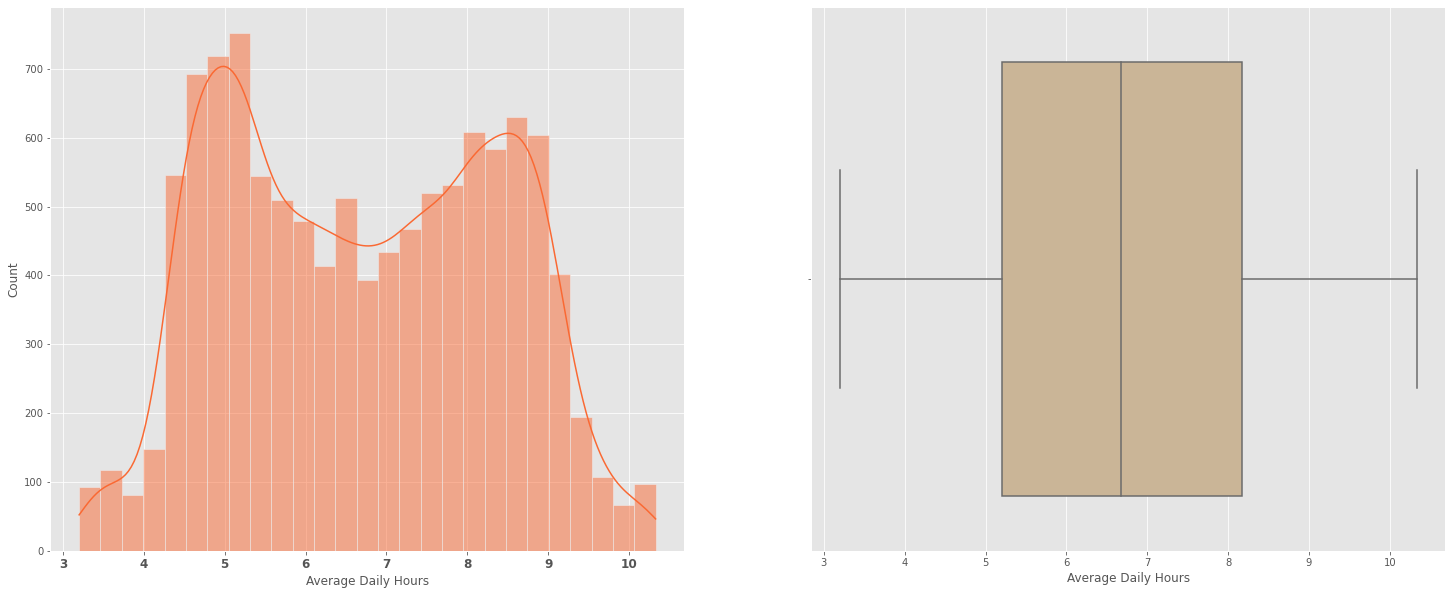

In [18]:
f, ax = plt.subplots(1,2,figsize=(25,10))
sns.histplot(data=train, x='average_daily_hours', kde=True,color=['#FA6933'], ax=ax[0])
sns.boxplot(data=train, x='average_daily_hours', palette = ['#D2B68F'],ax=ax[1])
ax[0].set_xticks(ticks=np.arange(3,11),weight='bold',size=12)
ax[0].set_xticklabels(labels = np.arange(3,11),weight='bold', size=12)
ax[0].set_xlabel("Average Daily Hours")
ax[1].set_xlabel("Average Daily Hours")
plt.show()

이상치는 존재하지 않는것으로 확인되며, 5시간정도 근무하는 직원들이 많았고, 8~9시간정도 근무하는 직원들도 많이 보였습니다.

### 하루평균근무시간에 따른 퇴사유무 확인

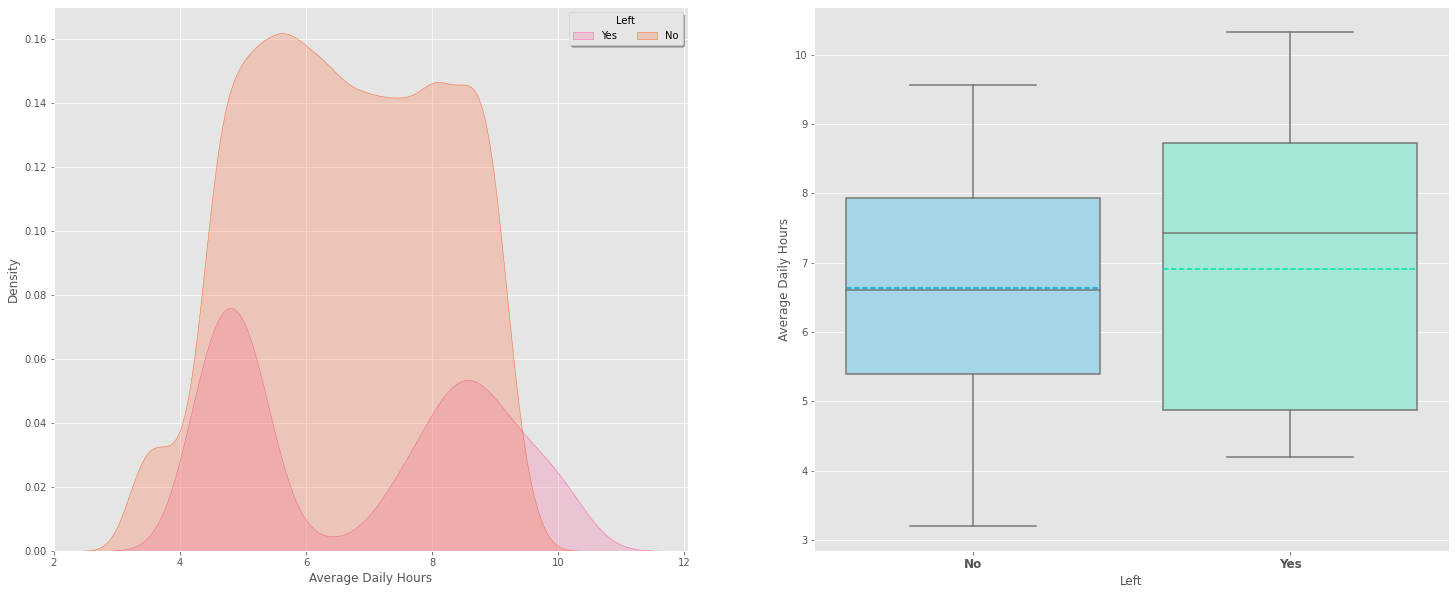

In [19]:
f, ax = plt.subplots(1,2,figsize=(25,10))
sns.kdeplot(data=train, x='average_daily_hours', hue='left',palette = ["#FA6933", "#FA61A6"], fill=True, ax=ax[0])
sns.boxplot(data=train, x='left', y='average_daily_hours', palette = ["#99DCF2", "#99F2DB"], ax=ax[1])
ax[0].legend(['Yes',"No"], ncol=2, frameon=True, shadow=True, title='Left')
ax[0].set_xlabel("Average Daily Hours")

ax[1].set_xlabel('Left')
ax[1].set_ylabel('Average Daily Hours')
ax[1].set_xticklabels(labels = ["No","Yes"],weight='bold', size=12)

#add mean line
left_mean = train.loc[train["left"]==1]['average_daily_hours'].mean()
unleft_mean = train.loc[train["left"]==0]['average_daily_hours'].mean()
plt.axhline(xmin=0.55, xmax=0.95,y=left_mean, color='#02E7AC', linestyle='dashed')
plt.axhline(xmin=0.05, xmax=0.45,y=unleft_mean, color='#00A9E0', linestyle='dashed')

plt.show()

퇴사를 한 직원들이 그렇지 않은 직원들 보다 하루 평균 근무시간이 조금 더 긴 것을 확인할 수 있습니다.

## 근속년수 특성 확인

In [20]:
train['time_spend_company'].unique()

array([ 3,  4,  6,  2,  5,  7, 10,  8], dtype=int64)

### 근속년수의 분포 확인

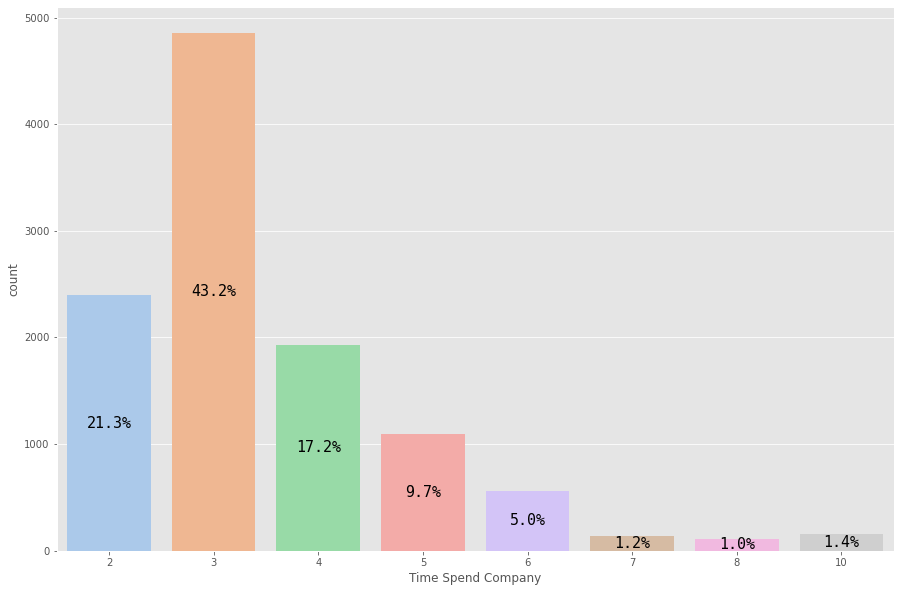

In [21]:
total = train['time_spend_company'].shape[0]
time_value = train['time_spend_company'].value_counts().values
time_ratios = train['time_spend_company'].value_counts() / total

plt.figure(figsize=(15,10))
sns.countplot(data=train, x='time_spend_company', palette = 'pastel')

for i in range(len(time_ratios)):
    x = time_ratios.index[i]
    value = str(round(time_ratios.values[i] * 100, 1))+"%"
    y = time_value[i]
    if x == 10:
        x = 9
    plt.text(x=x-2, y=y/2, s=value, fontsize=15, ha='center', va= 'center',fontfamily='monospace')
    
plt.xlabel('Time Spend Company')
plt.show()

3년차 직원들이 제일 많고, 2년차, 4년차 순으로 많습니다.  
7년차가 넘어갈수록 직원들이 많이 줄어들고 있습니다.

### 근속년수에 따른 퇴사유무 확인

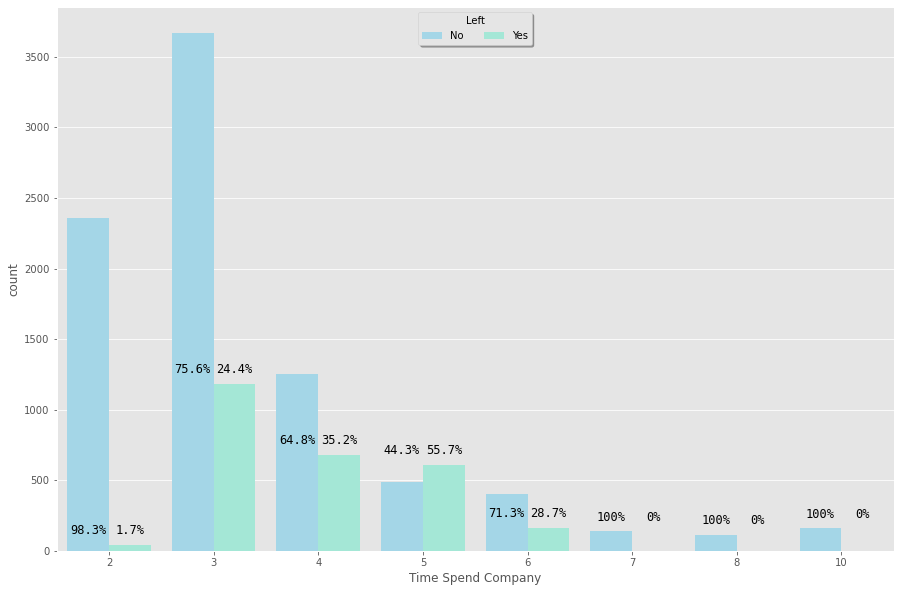

In [22]:
time_unique = sorted(train['time_spend_company'].unique())

plt.figure(figsize=(15,10))
sns.countplot(data=train, x='time_spend_company', hue='left', palette = ["#99DCF2", "#99F2DB"])
for i in range(len(time_unique)-3):
    ratio1 = train.loc[train['time_spend_company']==time_unique[i]]['left'].value_counts(normalize=True)[0]
    ratio2 = train.loc[train['time_spend_company']==time_unique[i]]['left'].value_counts(normalize=True)[1]
    y = train.loc[train['time_spend_company']==time_unique[i]]['left'].value_counts()[1]
    ratio1 = str(round(ratio1*100, 1)) + "%"
    ratio2 = str(round(ratio2*100, 1)) + "%"
    plt.text(x=i-0.2, y=y+100, s=ratio1, fontsize=12, ha='center', va= 'center',fontfamily='monospace')
    plt.text(x=i+0.2, y=y+100, s=ratio2, fontsize=12, ha='center', va= 'center',fontfamily='monospace')
temp = [7,8,10]
for i in range(len(temp)):
    y = train.loc[train['time_spend_company']==temp[i]]['left'].value_counts()[0]
    plt.text(x=i+5-0.2, y=y+100, s="100%", fontsize=12, ha='center', va= 'center',fontfamily='monospace')
    plt.text(x=i+5+0.2, y=y+100, s="0%", fontsize=12, ha='center', va= 'center',fontfamily='monospace')
plt.legend(['No',"Yes"], ncol=2, frameon=True, shadow=True, title='Left')
plt.xlabel('Time Spend Company')
plt.show()


3년차에 가장 많이 퇴사를 하며 2년차가 가장 적고, 4년차 5년차 순으로 퇴사를 합니다
흥미로운것은 7년차 이상인 직원들은 퇴사를 한 인원이 없다는 것입니다.

## 산업재해 특성 확인

In [23]:
train['Work_accident'].value_counts()[0]/ train['Work_accident'].shape[0]

0.8546537469997333

### 산업재해 분포 확인

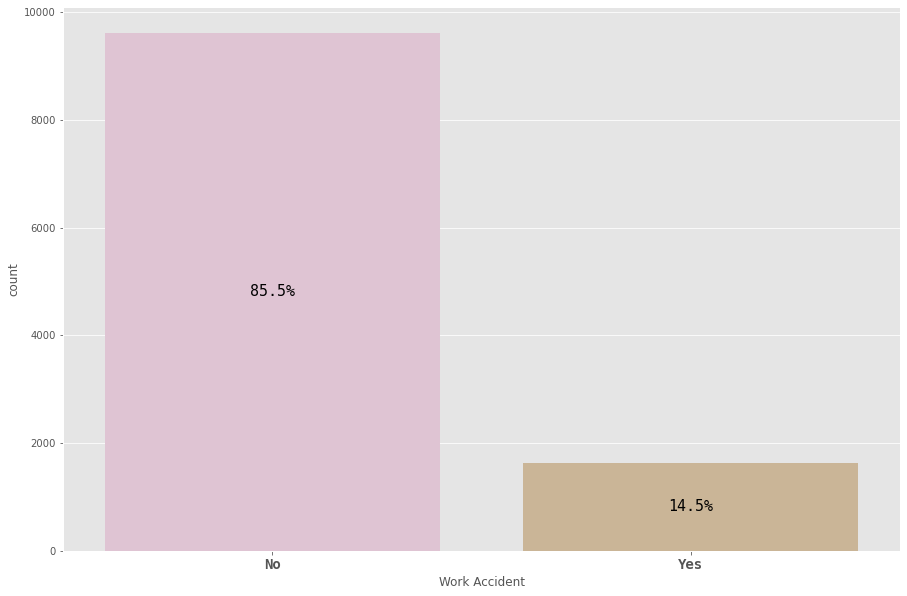

In [24]:
total = train['Work_accident'].shape[0]
work_accident_no = train['Work_accident'].value_counts()[0]
work_accident_yes = train['Work_accident'].value_counts()[1]

work_accident_no_ratio = work_accident_no / total
work_accident_no_ratio = str(round(work_accident_no_ratio * 100, 1)) + "%"
work_accident_yes_ratio = work_accident_yes / total
work_accident_yes_ratio = str(round(work_accident_yes_ratio* 100, 1)) + "%"

plt.figure(figsize=(15,10))
sns.countplot(data=train, x='Work_accident', palette = ['#E4BFD4',"#D2B68F"])
plt.text(x=0, y=work_accident_no/2, s=work_accident_no_ratio,fontsize=15, ha='center', va= 'center',fontfamily='monospace')
plt.text(x=1, y=work_accident_yes/2, s=work_accident_yes_ratio,fontsize=15, ha='center', va= 'center',fontfamily='monospace')
plt.xticks(ticks=[0,1], labels=['No',"Yes"], size=14, weight='bold', font='monospace')
plt.xlabel('Work Accident')
plt.show()

### 산업재해에 따른 퇴사유무 확인

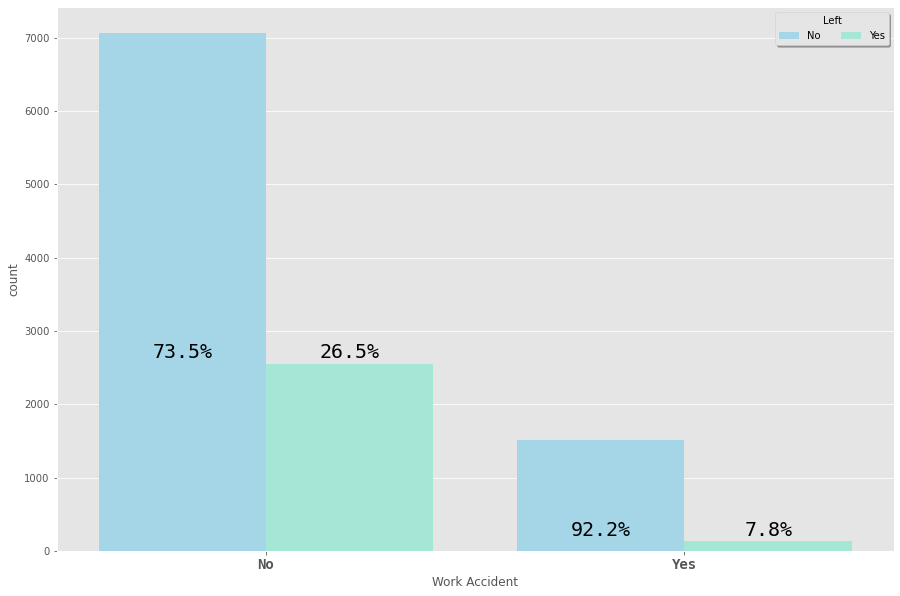

In [25]:

plt.figure(figsize=(15,10))
sns.countplot(data=train, x='Work_accident',hue='left', palette = ["#99DCF2", "#99F2DB"])

#text
for i in range(len([0,1])):
    accident_no_raio = train.loc[train['Work_accident'] == 0]['left'].value_counts(normalize=True)[i]
    accident_no_raio = str(round(accident_no_raio * 100, 1)) + "%"
    accident_no_value = train.loc[train['Work_accident'] == 0]['left'].value_counts()[1]
    
    accident_yes_raio = train.loc[train['Work_accident'] == 1]['left'].value_counts(normalize=True)[i]
    accident_yes_raio = str(round(accident_yes_raio * 100, 1)) + "%"
    accident_yes_value = train.loc[train['Work_accident'] == 1]['left'].value_counts()[1]
    if i == 0:
        x = -0.2
        plt.text(x=x, y=accident_no_value+150, s=accident_no_raio, fontsize=20, ha='center',va='center', fontfamily='monospace')
        plt.text(x=x+1, y=accident_yes_value+150, s=accident_yes_raio, fontsize=20, ha='center',va='center',fontfamily='monospace')
    else:
        x = 0.2
        plt.text(x=x, y=accident_no_value+150, s=accident_no_raio, fontsize=20, ha='center',va='center', fontfamily='monospace')
        plt.text(x=x+1, y=accident_yes_value+150, s=accident_yes_raio, fontsize=20, ha='center',va='center',fontfamily='monospace')

plt.xticks(ticks=[0,1], labels=['No',"Yes"], size=14, weight='bold', font='monospace')
plt.xlabel('Work Accident')
plt.legend(['No',"Yes"], ncol=2, frameon=True, shadow=True, title='Left')
plt.show()

전반적으로 산업재해를 당하지 않은 직원들이 많았고, 퇴사에 분포 또한 퇴사를 하지 않은 직원들이 더 많은 것으로 확인됩니다.

## 승진 특성 확인

### 승진의 분포 확인

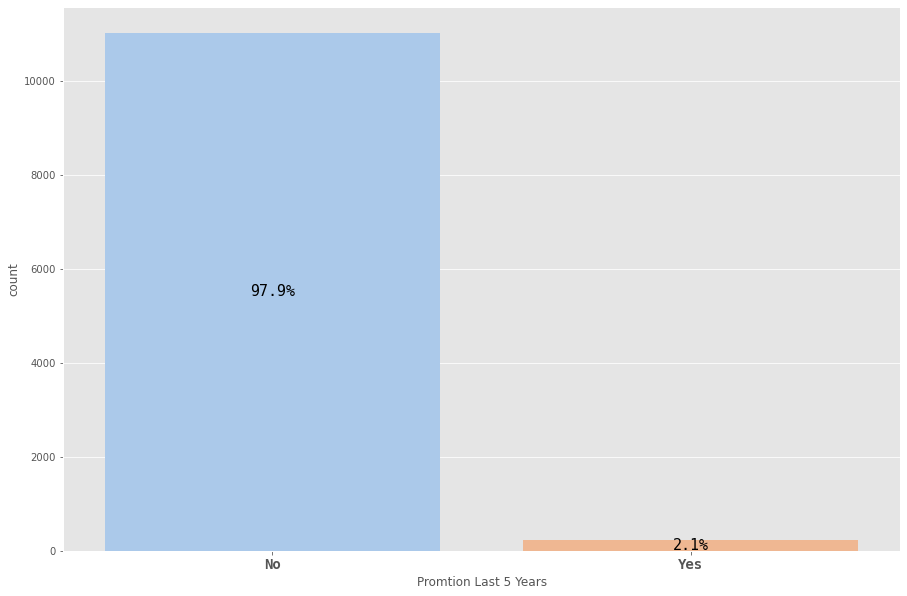

In [26]:
total = train['promotion_last_5years'].shape[0]
promotion_no = train['promotion_last_5years'].value_counts()[0]
promotion_yes = train['promotion_last_5years'].value_counts()[1]

promotion_no_ratio = promotion_no / total
promotion_no_ratio = str(round(promotion_no_ratio * 100, 1)) + "%"
promotion_yes_ratio = promotion_yes / total
promotion_yes_ratio = str(round(promotion_yes_ratio* 100, 1)) + "%"


plt.figure(figsize=(15,10))
sns.countplot(data=train, x='promotion_last_5years', palette = 'pastel')

plt.text(x=0, y=promotion_no/2, s=promotion_no_ratio,fontsize=15, ha='center', va= 'center',fontfamily='monospace')
plt.text(x=1, y=promotion_yes/2, s=promotion_yes_ratio,fontsize=15, ha='center', va= 'center',fontfamily='monospace')
plt.xticks(ticks=[0,1], labels=['No',"Yes"], size=14, weight='bold', font='monospace')
plt.xlabel("Promtion Last 5 Years")
plt.show()

지난 5년간 승진한인원이 승진하지 못한 인원보다 현저히 적어보입니다.

### 승진에 따른 퇴사의 분포

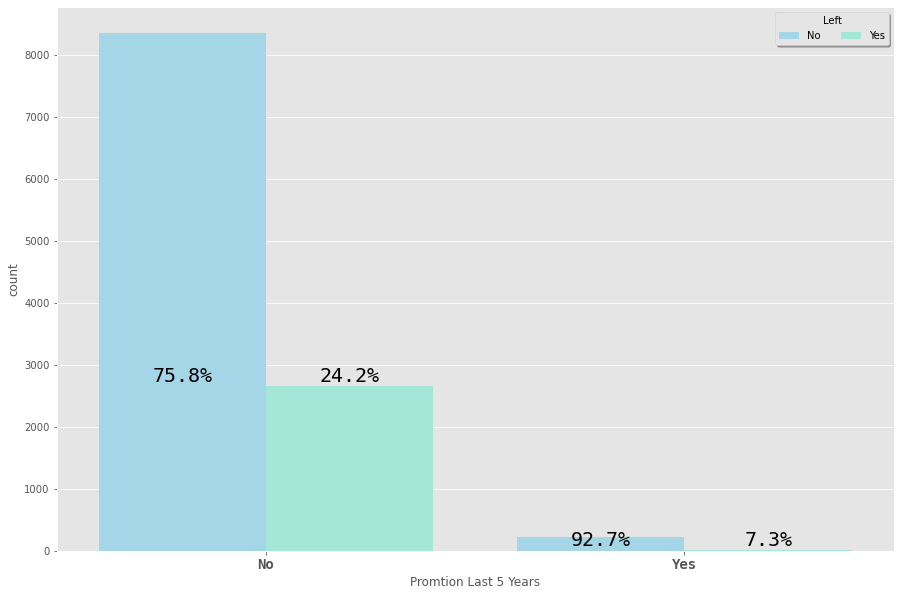

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(data=train, x='promotion_last_5years',hue='left',palette = ["#99DCF2", "#99F2DB"])

#text
for i in range(len([0,1])):
    promo_no_raio = train.loc[train['promotion_last_5years'] == 0]['left'].value_counts(normalize=True)[i]
    promo_no_raio = str(round(promo_no_raio * 100, 1)) + "%"
    promo_no_value = train.loc[train['promotion_last_5years'] == 0]['left'].value_counts()[1]
    
    promo_yes_raio = train.loc[train['promotion_last_5years'] == 1]['left'].value_counts(normalize=True)[i]
    promo_yes_raio = str(round(promo_yes_raio * 100, 1)) + "%"
    promo_yes_value = train.loc[train['promotion_last_5years'] == 1]['left'].value_counts()[1]
    if i == 0:
        x = -0.2
        plt.text(x=x, y=promo_no_value+150, s=promo_no_raio, fontsize=20, ha='center',va='center', fontfamily='monospace')
        plt.text(x=x+1, y=promo_yes_value+150, s=promo_yes_raio, fontsize=20, ha='center',va='center',fontfamily='monospace')
    else:
        x = 0.2
        plt.text(x=x, y=promo_no_value+150, s=promo_no_raio, fontsize=20, ha='center',va='center', fontfamily='monospace')
        plt.text(x=x+1, y=promo_yes_value+150, s=promo_yes_raio, fontsize=20, ha='center',va='center',fontfamily='monospace')

plt.xticks(ticks=[0,1], labels=['No',"Yes"], size=14, weight='bold', font='monospace')
plt.xlabel('Promtion Last 5 Years')
plt.legend(['No',"Yes"], ncol=2, frameon=True, shadow=True, title='Left')
plt.show()

승진의 분포를 확인해보면 승진하지 못한 직원들이 많고,  승진하지 못한 직원이 많았기 때문에 승진에 따른 퇴사의 분포를 확인해보면 승진하지 못한 직원들이 퇴사를 많이 한 것으로 확인 됩니다.

## 부서 특성 확인

In [28]:
train['Department'].unique()

array(['product_mng', 'sales', 'technical', 'support', 'RandD', 'IT',
       'marketing', 'hr', 'accounting', 'management'], dtype=object)

회사에는 총 10개의 부서가 존재합니다.
- `product_mng`: 상품개발부서
- `sales` : 영업부서
- `techincal` : 기술부서
- `support` : 지원부서
- `RandD(R&D)` : 연구개발부서
- `IT` : IT부서
- `marketing` : 마케팅부서
- `hr` : 인사부서
- `accounting` : 회계부서
- `management` : 운영관리부

### 부서의 분포 확인

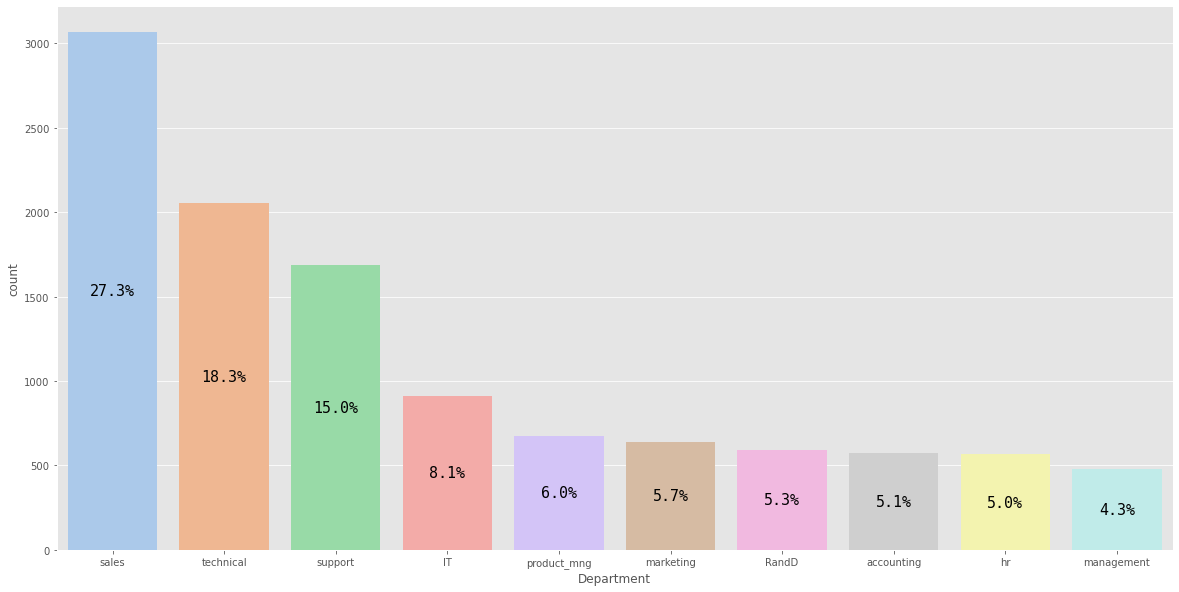

In [29]:
total = train['Department'].shape[0]
department_values = train['Department'].value_counts()
department_ratios = department_values.values / total
plt.figure(figsize=(20,10))
sns.countplot(data=train, x='Department', order=department_values.index, palette = 'pastel')
for i in range(len(department_ratios)):
    x = department_values.index[i]
    value = str(round(department_ratios[i] * 100, 1))+"%"
    y = department_values.values[i]
    plt.text(x=i, y=y/2, s=value, fontsize=15, ha='center', va= 'center',fontfamily='monospace')
plt.show()

### 부서별 퇴사의 분포

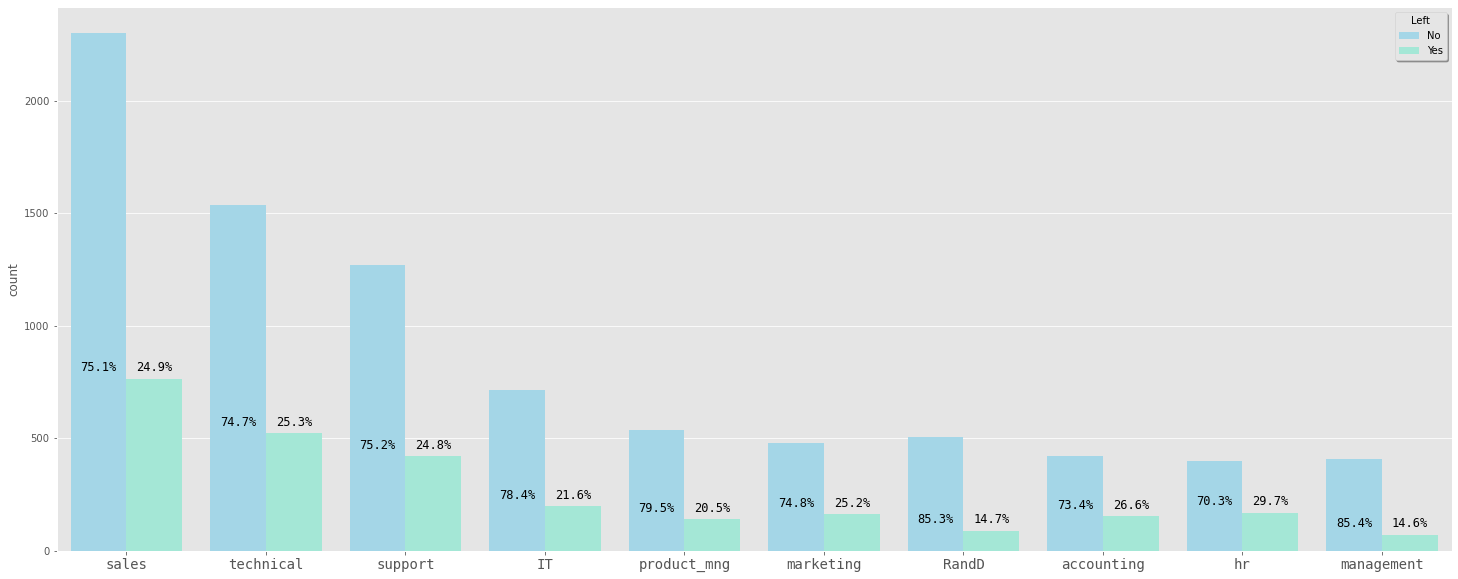

In [30]:
plt.figure(figsize=(25,10))
sns.countplot(data=train, x='Department', hue='left', order=department_values.index, palette = ["#99DCF2", "#99F2DB"])
department_unqiue = department_values.index
for i in range(len(department_unqiue)):
    y = train.loc[train['Department']==department_unqiue[i]]['left'].value_counts()[1]
    ratio1 = train.loc[train['Department']==department_unqiue[i]]['left'].value_counts(normalize=True)[0]
    ratio2 = train.loc[train['Department']==department_unqiue[i]]['left'].value_counts(normalize=True)[1]
    ratio1 = str(round(ratio1 * 100,1)) + "%"
    ratio2 = str(round(ratio2 * 100,1)) + "%"
    plt.text(x=i-0.2, y=y+50, s=ratio1, ha='center', va='center', fontsize=12, fontfamily='monospace')
    plt.text(x=i+0.2, y=y+50, s=ratio2, ha='center', va='center', fontsize=12, fontfamily='monospace')
plt.legend(['No',"Yes"], title="Left", frameon=True, shadow=True,)
plt.xticks(size=14, fontfamily='monospace')
plt.xlabel("")

plt.show()

부서별 퇴사의 분포를 확인하면 약 20~30%정도로 퇴사율을보이고 있습니다. RandD 부서 management 낮은 퇴사율을 보이고 있습니다.

## 급여 특성 확인

In [31]:
train['salary'].unique()

array(['medium', 'low', 'high'], dtype=object)

급여 특성은 3가지로 되어있습니다.
- `low` : 하
- `medium` : 중
- `high` : 상

### 급여의 분포 확인

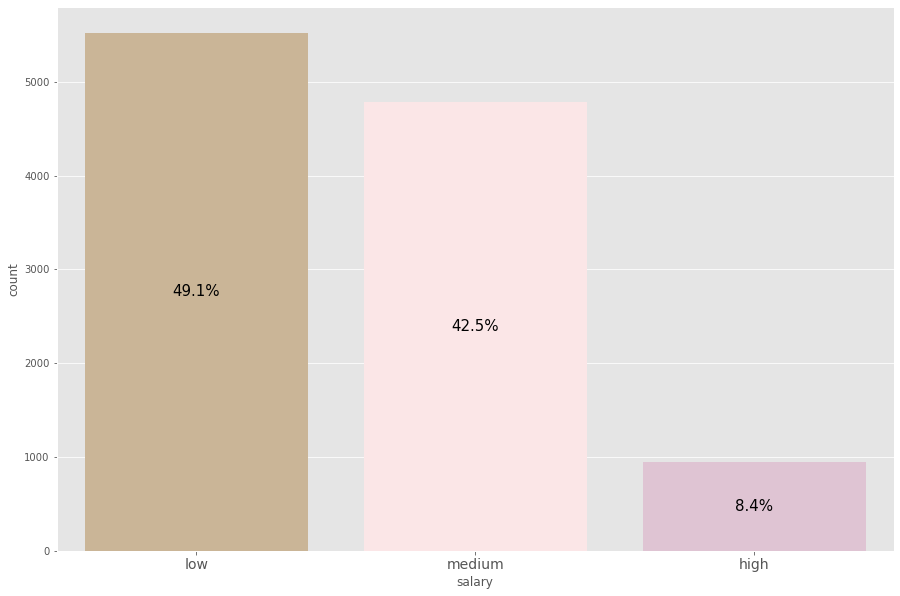

In [32]:
salary_value = train['salary'].value_counts()
salry_ratio = train['salary'].value_counts(normalize=True)
plt.figure(figsize=(15,10))
sns.countplot(data=train, x='salary', order=salary_value.index, palette= ["#D2B68F","#FFE2E4","#E4BFD4"])
for i in range(len(salary_value.index)):
    text = str(round(salry_ratio[i]* 100, 1)) + "%"
    plt.text(x=i, y=salary_value.values[i]/2, s=text, va='center', ha='center', fontsize=15)
plt.xticks(fontsize=14)
plt.show()

49%직원들이 low수준의 급여를 받고 약 8.4%의 직원들만 high의 급여를 받습니다.

### 급여수준별 퇴사의 분포

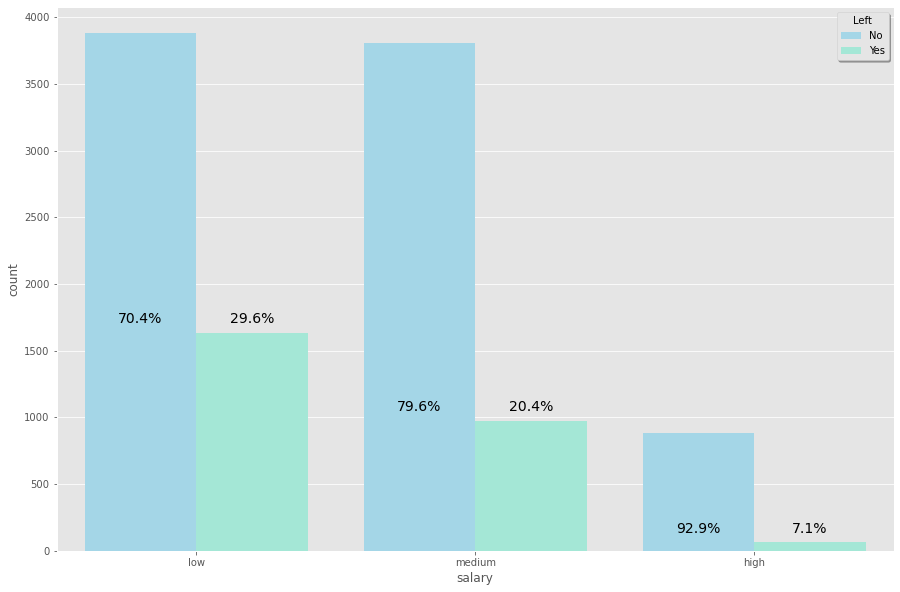

In [33]:
salary_unique = salary_value.index

plt.figure(figsize=(15,10))
sns.countplot(data=train, x='salary', hue='left', order=salary_value.index, palette = ["#99DCF2", "#99F2DB"])
for i in range(len(salary_unique)):
    ratio1= train.loc[train['salary'] == salary_unique[i]]['left'].value_counts(normalize=True)[0]
    ratio2= train.loc[train['salary'] == salary_unique[i]]['left'].value_counts(normalize=True)[1]
    ratio1 = str(round(ratio1 * 100, 1)) + "%"
    ratio2 = str(round(ratio2 * 100, 1)) + "%"
    
    y = train.loc[train['salary'] == salary_unique[i]]['left'].value_counts()[1]
    plt.text(x=i-0.2, y=y+100, s=ratio1,va='center', ha='center', fontsize=14)
    plt.text(x=i+0.2, y=y+100, s=ratio2,va='center', ha='center', fontsize=14)
plt.legend(['No',"Yes"], title="Left", frameon=True, shadow=True,)
plt.show()

급여의 수준이 high 일때 퇴사를 한 인원의 비율이 훨씬 적은 것을 확인할 수 있습니다.  
low의 경우는 약 7대3, medium의 경우는 약 8대 2로 높은 것을 확인할 수 있습니다.

## 각 특성들의 상관관계

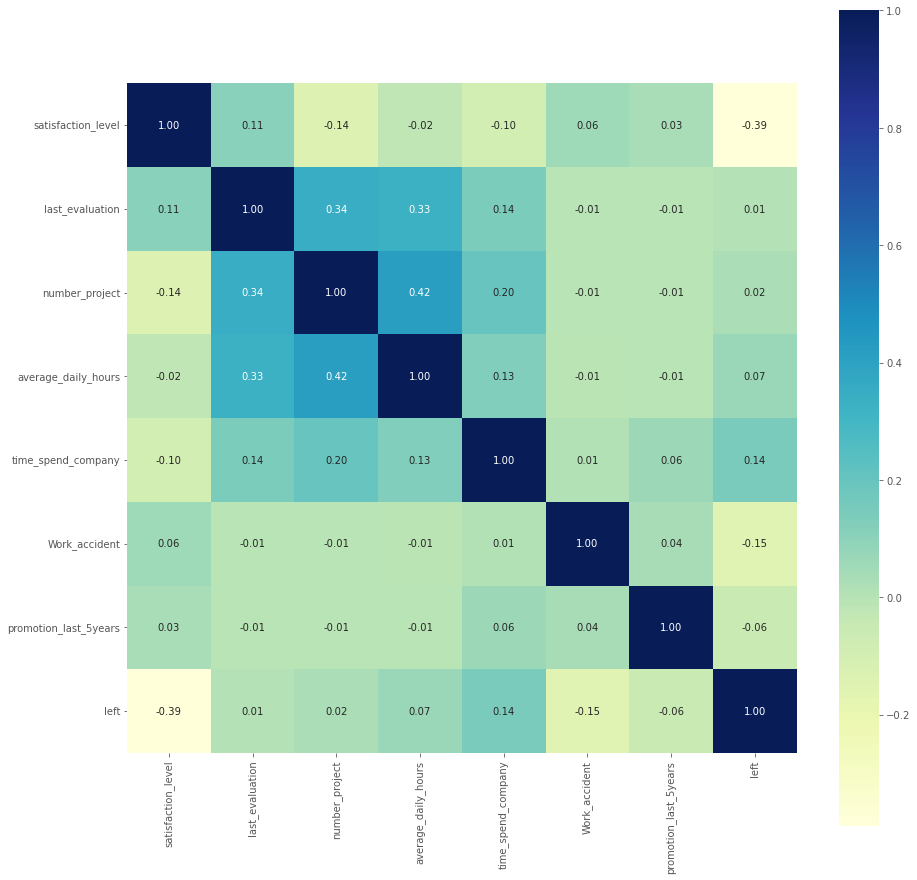

In [34]:
corr = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True, fmt='.2f', cmap='YlGnBu')
plt.show()

상관관계를 확인해보니 `left`와 `satisfaction_level`은 서로 음의 상관을 보이는 것으로 확인되었습니다.  
직원들이 불만족할수록 퇴사를 한다고 볼 수 있습니다.

또한 `average_daily_hours`와 `number_project`를 확인해보니 0.42로 가장 높은 상관을 보였는데 프로젝트의 수가 많을 수록  
하루평균 근무시간이 길어지는 의미로 해석할 수 있겠습니다.

지금까지 위에서는 각 특성들이 타겟과의관계를 살펴보았고, 다른 특성들간의 관계를 확인해보도록 하겠습니다.

## 부서별 만족도 확인

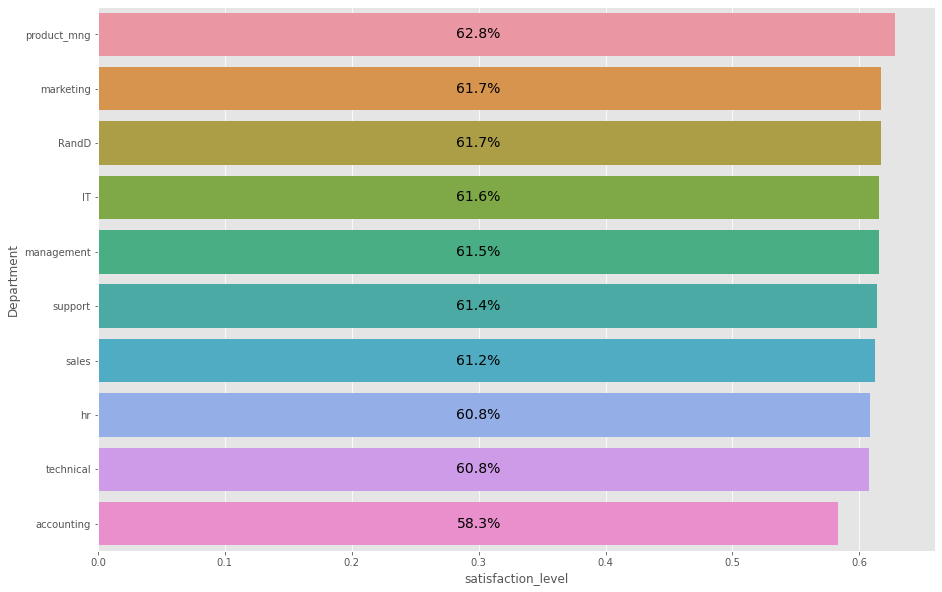

In [35]:
department_level = pd.DataFrame(train.groupby("Department")['satisfaction_level'].mean()).sort_values('satisfaction_level', ascending=False).reset_index()
plt.figure(figsize=(15,10))
ax = sns.barplot(data=department_level, x='satisfaction_level', y='Department')
department_level_values = department_level['satisfaction_level'].values
for i in range(len(department_level_values)):
    ratio  = str(round(department_level_values[i] * 100,1))+"%"
    plt.text(x=0.3, y=ax.get_yticks()[i], s=ratio, fontsize=14,va='center', ha='center')
plt.show()

각 부서별 만족도는 부서에 따라 다르지 않습니다.

### 부서별 퇴사자/비퇴사자 만족도

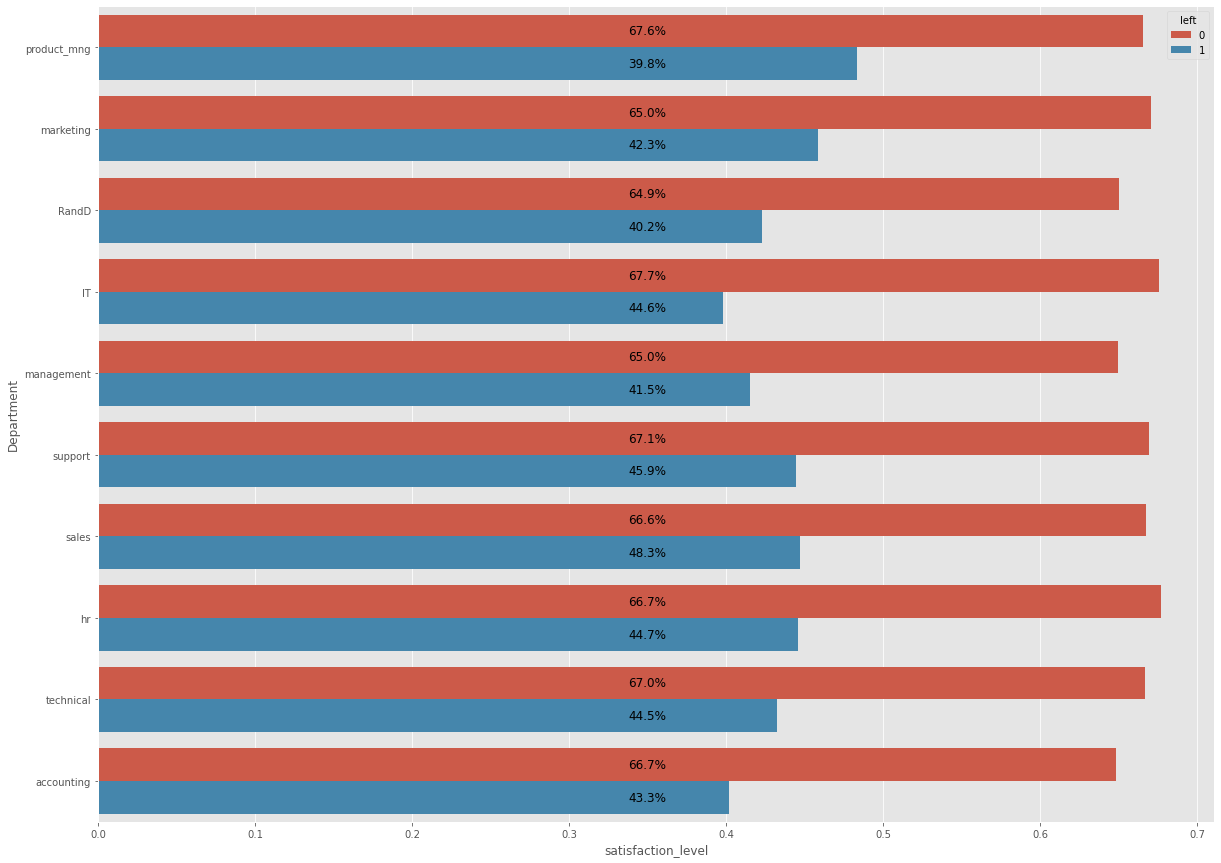

In [36]:
department_level_left = train.groupby(['Department', "left"])['satisfaction_level'].mean().reset_index()
plt.figure(figsize=(20,15))
ax = sns.barplot(data=department_level_left, x='satisfaction_level', y='Department', hue='left', order=department_level['Department'].values)
for i in range(len(department_level_left['Department'].unique())):
    ratio1 = department_level_left.loc[department_level_left['left']==0]['satisfaction_level'].values[i]
    ratio2 = department_level_left.loc[department_level_left['left']==1]['satisfaction_level'].values[i]
    ratio1 = str(round(ratio1 * 100, 1)) + "%"
    ratio2 = str(round(ratio2 * 100, 1)) + "%"
    plt.text(x=0.35, y=ax.get_yticks()[i]-0.2, s=ratio1, fontsize=12, va='center', ha='center')
    plt.text(x=0.35, y=ax.get_yticks()[i]+0.2, s=ratio2, fontsize=12, va='center', ha='center')
plt.show()

부서별 퇴사자가 비퇴사자의 만족도보다 떨어지지만  
각 부서별로 퇴사자,비퇴사자 만족도가 크게 차이가 있어보이지는 않습니다.

# 불필요한 데이터 제거

불필요한 ID 컬럼을 제거해주도록 하겠습니다.

In [37]:
train = train.drop(['Emp_Id'], axis=1)
X_test = X_test.drop(["Emp_Id"], axis=1)

# 모델학습

위에서 합쳐주었던 Train Set을 다시 분리 시켜주도록 하겠습니다.

In [38]:
X_train = train.drop(target, axis=1)
y_train= train[target]
X_train.shape, y_train.shape

((11249, 9), (11249,))

In [39]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_daily_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
4037,0.86,64.0,5,6.27,3,0,0,product_mng,medium
9257,0.95,94.0,2,8.97,4,1,0,sales,low
13183,0.89,74.0,5,8.67,6,0,0,technical,medium
5921,0.78,95.0,5,9.10,2,0,0,technical,low
1574,0.36,51.0,2,4.30,3,0,0,support,low


In [40]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_daily_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
12245,0.45,46.0,2,5.17,3,0,0,sales,low
10133,0.57,54.0,4,4.73,4,0,0,technical,medium
12006,0.10,77.0,6,8.23,4,0,0,sales,low
8563,0.20,90.0,3,7.27,4,0,0,sales,low
5420,0.70,60.0,3,6.10,3,0,0,sales,low


## 라이브러리 로드

In [41]:

from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

import shap
from pdpbox import pdp

C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 기준모델 설정

타겟의 최빈값으로 기준모델을 설정하기에는 타겟이 불균형하기 때문에 간단한 모델의 f1_score을 기준모델로 설정하겠습니다.

In [42]:
preprocessing_pipe = make_pipeline(
    OrdinalEncoder(),
    StandardScaler()
)
lr_pipe = Pipeline([
    ("preprocessing", preprocessing_pipe),
    ('model', LogisticRegression())
])
lr_pipe.fit(X_train, y_train)
lr_pred = lr_pipe.predict(X_test)
print(f1_score(y_test, lr_pred))

0.3386004514672686


f1_score가 0.33으로 낮게 형성이 되는 것을 확인할 수 있습니다.  
추측으로는 데이터가 선형적이기 않기 때문에 선형모델인 LogisticRegression에서는 좋은 성능을 내지 못한것으로 생각됩니다. 

비선형적인 데이터에서 좋은 성능을 낼 수 있는 트리기반의 앙상블모델인 RandomForest와 XGBBoost를 사용해보도록하겠습니다.

### RandomForest

In [43]:
rf_pipe = Pipeline([
    ("preprocessing", preprocessing_pipe),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
print("Train F1 Score : ", f1_score(y_train, rf_pipe.predict(X_train)))
print("Test F1 Score : ", f1_score(y_test, rf_pred))

Train F1 Score :  1.0
Test F1 Score :  0.9789653212052303


### XGBoost

In [44]:
xgb_pipe = Pipeline([
    ("preprocessing", preprocessing_pipe),
    ('model', XGBClassifier(random_state=42, n_jobs=-1, objective='binary:logistic'))
])
xgb_pipe.fit(X_train, y_train)
xgb_pred = xgb_pipe.predict(X_test)
print("Train F1 Score : ", f1_score(y_train, xgb_pipe.predict(X_train)))
print("Test F1 Score : ", f1_score(y_test, xgb_pred))

[16:00:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train F1 Score :  0.994946659180236
Test F1 Score :  0.9717514124293786


파라미터를 튜닝하지 않은 RandomForest와 XGBBoost의 결과를 확인해보니 기준 모델 보다는 좋은 성능을 냈지만,  
과적합된 모습을 확인할 수 있습니다.

## 교차검증과 하이퍼파라미터튜닝

안정적인 성능을 측정하기 위하여 교차검증을 사용하겠습니다.  
과적합을 해소하며 모델의 성능을 높이기 위하여 하이퍼파라미터 튜닝을 진행하고,  
교차검증과 하이퍼 파라미터 튜닝을 도와주는 RandomizedSearchCV를 사용하여 진행하겠습니다.

### RandomForest

In [45]:
rf_pipe = Pipeline([
    ("preprocessing", preprocessing_pipe),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000))
])

rf_params = {
    "model__max_depth" : np.arange(3, 10),
    "model__min_samples_leaf" : np.arange(2, 20),
    "model__min_samples_split" : np.arange(2, 20),
}
rf_clf = RandomizedSearchCV(rf_pipe, cv=5, param_distributions=rf_params, random_state=42, scoring='f1',n_iter=100, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('ordinalencoder',
                                                               OrdinalEncoder(cols=['Department',
                                                                                    'salary'],
                                                                              mapping=[{'col': 'Department',
                                                                                        'data_type': dtype('O'),
                                                                                        'mapping': product_mng     1
sales           2
technical       3
support         4
RandD           5
IT              6
marketing       7
hr              8
accounting      9
management     10
NaN            -2
dtype: int64},
                                                                                       {'col': 'salary',

In [46]:
rf_best_param = rf_clf.best_params_
rf_best_score = rf_clf.best_score_
rf_best_estimator = rf_clf.best_estimator_
print("Best Param : ",rf_best_param)
print("Best Score : ",rf_best_score)

Best Param :  {'model__min_samples_split': 3, 'model__min_samples_leaf': 2, 'model__max_depth': 8}
Best Score :  0.9538831769797003


In [47]:
rf_clf_pred = rf_clf.predict(X_test)
print("Test F1 Score : ", f1_score(y_test, rf_clf_pred))

Test F1 Score :  0.9594907407407408


### XGBoost

In [48]:
xgb_pipe = Pipeline([
    ("preprocessing", preprocessing_pipe),
    ('model', XGBClassifier(random_state=42, n_jobs=-1, n_estimators=1000, objective='binary:logistic',use_label_encoder=False))
])

xgb_params = {
    "model__max_depth" : np.arange(3, 10),
    "model__min_child_weight" : np.arange(2, 20),
    "model__gamma" : np.arange(2,20),
    "model__learning_rate" : np.arange(0.01, 0.2, 0.01)
}
xgb_clf = RandomizedSearchCV(xgb_pipe, cv=5, param_distributions=xgb_params, random_state=42, scoring='f1',n_iter=100, n_jobs=-1)
xgb_clf.fit(X_train, y_train)

[16:09:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('ordinalencoder',
                                                               OrdinalEncoder(cols=['Department',
                                                                                    'salary'],
                                                                              mapping=[{'col': 'Department',
                                                                                        'data_type': dtype('O'),
                                                                                        'mapping': product_mng     1
sales           2
technical       3
support         4
RandD           5
IT              6
marketing       7
hr              8
accounting      9
management     10
NaN            -2
dtype: int64},
                                                                                       {'col': 'salary',

In [49]:
xgb_best_param = xgb_clf.best_params_
xgb_best_score = xgb_clf.best_score_
xgb_best_estimator = xgb_clf.best_estimator_
print("Best Param : ",xgb_best_param)
print("Best Score : ",xgb_best_score)

Best Param :  {'model__min_child_weight': 3, 'model__max_depth': 7, 'model__learning_rate': 0.13, 'model__gamma': 2}
Best Score :  0.9573479074669194


In [50]:
xgb_clf_pred = xgb_clf.predict(X_test)
print("Test F1 Score : ", f1_score(y_test, xgb_clf_pred))

Test F1 Score :  0.9602763385146805


In [51]:
print("XGB > RandomForest")
f1_score(y_test, xgb_clf_pred) > f1_score(y_test, rf_clf_pred)

XGB > RandomForest


True

XGBoost 모델의 F1 Score가 RandomForest의 F1 Score보다 높기 때문에 XGBoost를 최종모델로 정하고 모델을 해석하겠습니다.

# 모델해석

## 특성중요도

In [52]:
feature_importances = pd.DataFrame(xgb_best_estimator['model'].feature_importances_, index=X_train.columns, columns=['importance'])
feature_importances.sort_values("importance", ascending=False)

,importance
satisfaction_level,0.387044
time_spend_company,0.212874
number_project,0.155430
last_evaluation,0.118543
average_daily_hours,0.055767
Work_accident,0.030052
salary,0.021589
Department,0.018701
promotion_last_5years,0.000000


## 순열중요도

In [53]:
import eli5
from eli5.sklearn import PermutationImportance
X_test_pre =xgb_best_estimator.named_steps['preprocessing'].transform(X_test)
permuter = PermutationImportance(
    estimator = xgb_best_estimator.named_steps['model'],
    scoring = 'f1',
    n_iter = 1000,
    random_state = 42
)
permuter.fit(X_test_pre, y_test)

PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              enable_categorical=False, gamma=2,
                                              gpu_id=-1, importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.13,
                                              max_delta_step=0, max_depth=7,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=1000, n_jobs=-1,
                                              num_parallel_tree=1,
                                              pre

In [54]:
feature_names = X_train.columns.tolist()
mda = pd.DataFrame(permuter.feature_importances_, columns=['value'],index = feature_names).sort_values('value', ascending=False)
mda

,value
satisfaction_level,0.534547
last_evaluation,0.309630
number_project,0.284386
average_daily_hours,0.244620
time_spend_company,0.139140
Work_accident,0.002604
salary,0.000693
Department,0.000363
promotion_last_5years,0.000000


XGBoost가 성능을 높이는데 중요한 특성입니다.
만족도, 최근평가점수, 프로젝트 수 특성을 중요하다고 판단했습니다.

## 특성의 기여도

In [55]:
import shap

model = xgb_best_estimator.named_steps["model"]
X_test_pre = xgb_best_estimator.named_steps['preprocessing'].transform(X_test)
X_test_pre = pd.DataFrame(X_test_pre, columns = X_test.columns)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_pre)

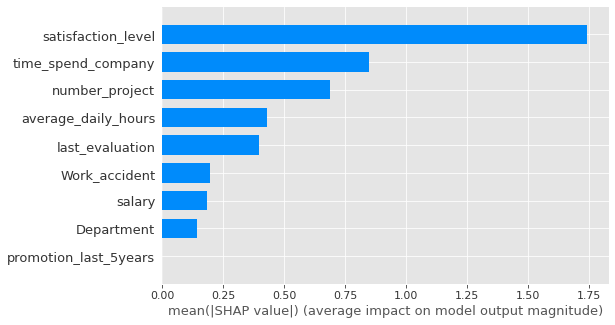

In [56]:
shap.summary_plot(shap_values, X_test_pre, plot_type="bar")

모델이 예측하는데 어떤 특성이 기여를 많이 했는가를 확인해보면 만족도, 근속년수, 프로젝트의 수가 평균적으로 많이 기여했다고 보여집니다.

In [57]:
test_sample1 = X_test.iloc[[0]]
print(xgb_clf.predict(test_sample1))
test_sample1 = xgb_best_estimator.named_steps['preprocessing'].transform(test_sample1)
test_sample1 = pd.DataFrame(test_sample1, columns=X_test.columns)

[1]


퇴사자라고 예측한 데이터를 shap에서는 어떻게 이렇게 예측할 수 있었는지 확인해보겠습니다.

In [58]:
test1_shap_value = explainer.shap_values(test_sample1)
shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values =test1_shap_value,
    features = test_sample1,
    link='logit'
)

퇴사자(1)라고 예측한 경우를 확인해보면 만족도, 프로젝트 수, 평가점수와 같은 빨간색 영역은 퇴사자라고 예측한 것에 양의 방향으로 영향을 준것으로 확인이 되고 근속년수는 음의 방향으로 영향을 주었다고 볼 수 있습니다.

In [59]:
test_sample2 = X_test.iloc[[1]]
print(xgb_clf.predict(test_sample2))
test_sample2 = xgb_best_estimator.named_steps['preprocessing'].transform(test_sample2)
test_sample2 = pd.DataFrame(test_sample2, columns=X_test.columns)

[0]


반대로 재직자라로 예측한 값을 어떻게 예측하였는지 확인하겠습니다.

In [60]:
test2_shap_value = explainer.shap_values(test_sample2)
shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values =test2_shap_value,
    features = test_sample2,
    link='logit'
)

퇴사자가 아니(0)라고 예측한 경우에는 만족도, 하루 평균 근무 시간 프로젝트의 수와 같은 컬럼들이 음의 방향으로 영향을 주고, 산업재해, 부서, 근속년수는 양의 방향으로 영향을 주었다고 볼 수 있습니다.